# Music Sync with Dynamic Time Warping

demonstrate the use of dynamic time warping for music synchronisation

In [10]:
import numpy as np
import librosa
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

[Text(0.5, 1.0, 'Faster version x_2')]

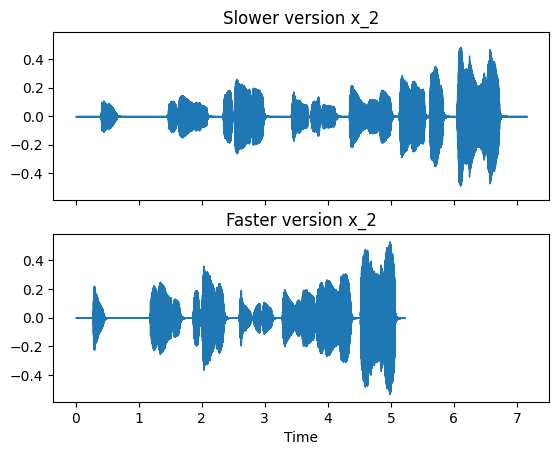

In [11]:
x_1, fs = librosa.load('audio/sir_duke_slow.ogg')
x_2, fs = librosa.load('audio/sir_duke_fast.ogg')

fig, ax = plt.subplots(nrows = 2, sharex = True, sharey = True)
librosa.display.waveshow(x_1, sr = fs, ax = ax[0])

ax[0].set(title = 'Slower version x_2')
ax[0].label_outer()

librosa.display.waveshow(x_2, sr = fs, ax = ax[1])
ax[1].set(title = 'Faster version x_2')

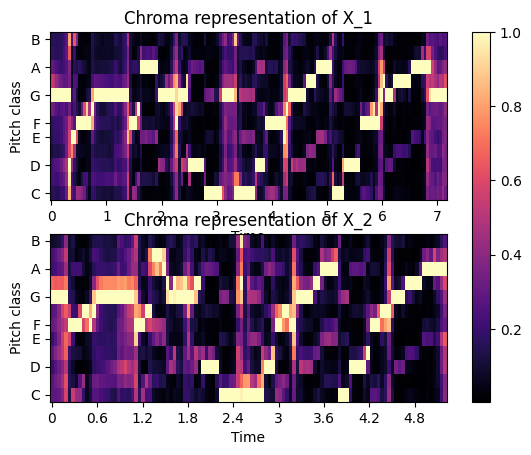

In [12]:
# extracting chroma features
# chroma features represent energy distribution across 12 feature classes(semitones of musical octave/musical notes)

hop_length = 1024

x_1_chroma = librosa.feature.chroma_cqt(y = x_1, sr = fs, hop_length = hop_length)
x_2_chroma = librosa.feature.chroma_cqt(y = x_2, sr = fs, hop_length = hop_length)

fig, ax = plt.subplots(nrows = 2, sharey = True)

img = librosa.display.specshow(x_1_chroma, x_axis = 'time', y_axis = 'chroma', hop_length = hop_length, ax = ax[0])
ax[0].set(title = 'Chroma representation of X_1')

librosa.display.specshow(x_2_chroma, x_axis = 'time', y_axis = 'chroma', hop_length = hop_length, ax = ax[1])
ax[1].set(title = 'Chroma representation of X_2')

fig.colorbar(img, ax = ax)

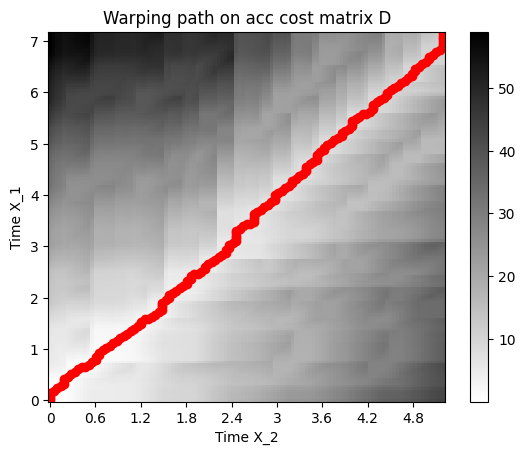

In [13]:
# align chroma sequences

D, wp = librosa.sequence.dtw(X = x_1_chroma, Y = x_2_chroma, metric = 'cosine')
wp_s = librosa.frames_to_time(wp, sr = fs, hop_length = hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis = 'time', y_axis = 'time', sr = fs, cmap = 'gray_r', hop_length = hop_length, ax = ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker = 'o', color = 'r')
ax.set(title = 'Warping path on acc cost matrix D', xlabel = 'Time X_2', ylabel = 'Time X_1')
fig.colorbar(img, ax = ax)

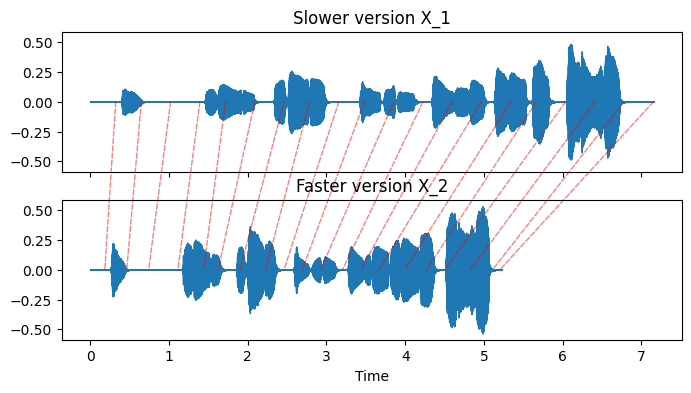

In [14]:
# alternate visualisation

fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, sharey = True, figsize = (8, 4))

librosa.display.waveshow(x_2, sr = fs, ax = ax2)
ax2.set(title = 'Faster version X_2')

librosa.display.waveshow(x_1, sr = fs, ax = ax1)
ax1.set(title = 'Slower version X_1')
ax1.label_outer()

n_arrows = 20
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    con = ConnectionPatch(xyA = (tp1, 0), xyB = (tp2, 0), axesA = ax1, axesB = ax2, coordsA = 'data', coordsB = 'data', color = 'r', linestyle = '--', alpha = 0.5)
    con.set_in_layout(False)
    ax2.add_artist(con)